# Usage
- DataFrames are cleaned and prepared in t-analysis-dataPrep.ipynb
- Load pickled files from '../workproduct-files/cleaned-dataframes/...'

# Setup

In [2]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
#from Levenshtein import ratio as stringSimilarity

# from tqdm._tqdm_notebook import tqdm_notebook
# from ipywidgets import IntProgress


# tqdm_notebook.pandas()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [3]:
tdb = pd.read_pickle('../workproduct-files/cleaned-dataframes/tdb.pkl')
opentdb = pd.read_pickle('../workproduct-files/cleaned-dataframes/opentdb.pkl')
tfyi = pd.read_pickle('../workproduct-files/cleaned-dataframes/tfyi.pkl')
rtg = pd.read_pickle('../workproduct-files/cleaned-dataframes/rtg.pkl')

# Descriptive analyses

## RTG dataset (~20500 rows)

In [4]:
print(f'Row count: {len(rtg)}\n')
print(f'Column names: {rtg.columns.values}\n')
print(f'Categories: {rtg["categories"].unique()}\n')
print(f'Category count: {len(rtg["categories"].unique())}\n')
print(f'Duplicate questions: {len(rtg[rtg.duplicated(["question"])])}\n')

Row count: 20521

Column names: ['_id' 'question_no_a' 'question' 'answer' 'user' 'categories' 'tags'
 'created' 'question_no_h' 'question_no_s' 'question_no_m' 'question_no_g'
 'question_no_e']

Categories: ['arts' 'history' 'science' 'general' 'entertainment' 'geography' 'misc'
 'art' 'entertanment' 'History' 'Science']

Category count: 11

Duplicate questions: 1238



In [5]:
created = rtg.resample('M', on = 'created').count()
created.set_index('created')
created = created['_id']
created = created.to_frame()
created['cumsum'] = created['_id'].cumsum()


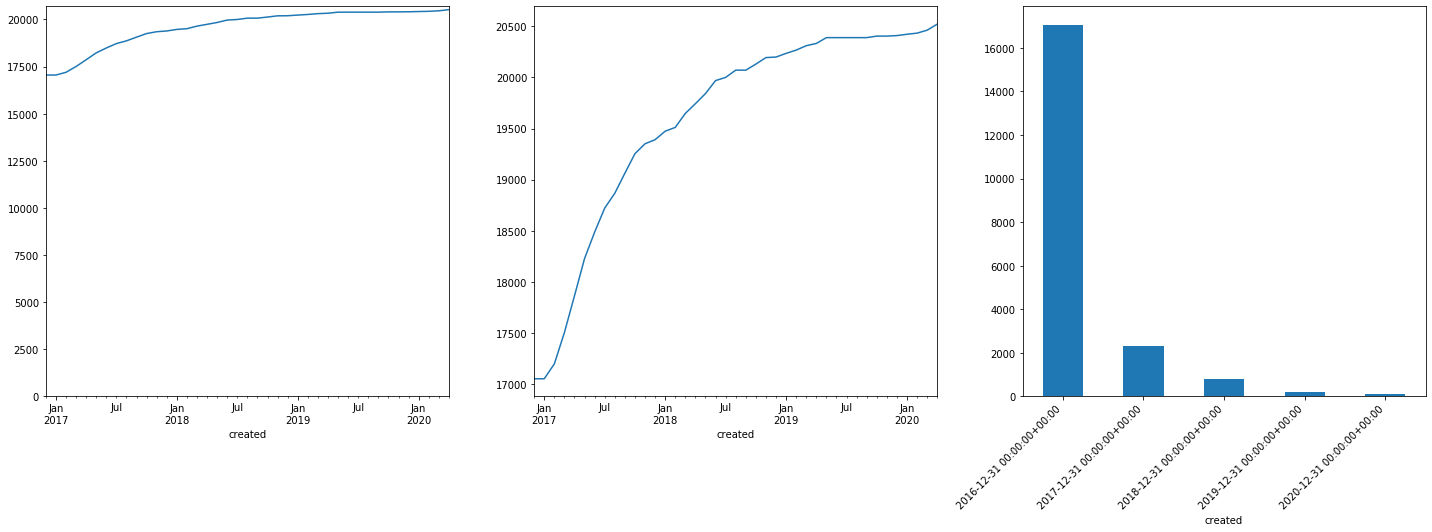

In [6]:
fig, ax = plt.subplots(figsize=(20, 7.5))
plt.subplot(1, 3, 1)
created['cumsum'].plot()
plt.ylim(ymin=0)

plt.subplot(1, 3, 2)
created['cumsum'].plot()

#plt.tight_layout()
#plt.show()

yearly = rtg.resample('Y', on = 'created').count()
plt.subplot(1, 3, 3)
yearly['_id'].plot.bar()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [7]:
cats = rtg.groupby('categories').count().sort_values(ascending = False, by = '_id')

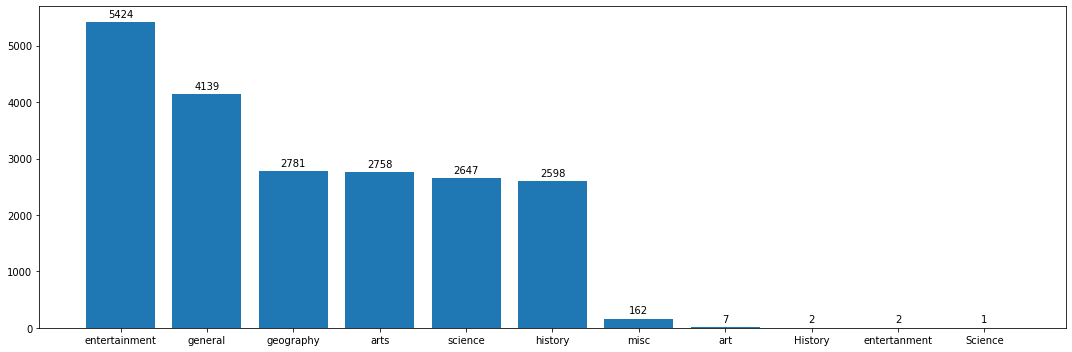

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

x = np.arange(len(cats.index.values))

toPlot = ax.bar(x, height = cats['_id'])

ax.set_xticklabels(cats.index)
ax.set_xticks(np.arange(len(cats.index.values)))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(toPlot)
        
fig.tight_layout()

plt.show()


In [9]:
rtg_catShare = rtg.copy()
rtg_catShare['origData'] = rtg_catShare['created'].apply(lambda x: x.year == 2016)
rtg_catShare = rtg_catShare.pivot_table(index = 'categories', columns = 'origData', aggfunc = 'count', fill_value = 0)
rtg_catShare = rtg_catShare['_id']
rtg_catShare['Share - original set'] = rtg_catShare[False] / rtg_catShare[False].sum()
rtg_catShare['Share - incremental set'] = rtg_catShare[True] / rtg_catShare[True].sum()
rtg_catShare.sort_values(by = ['Share - original set'], ascending = False, inplace = True)
rtg_catShare = rtg_catShare.transpose()

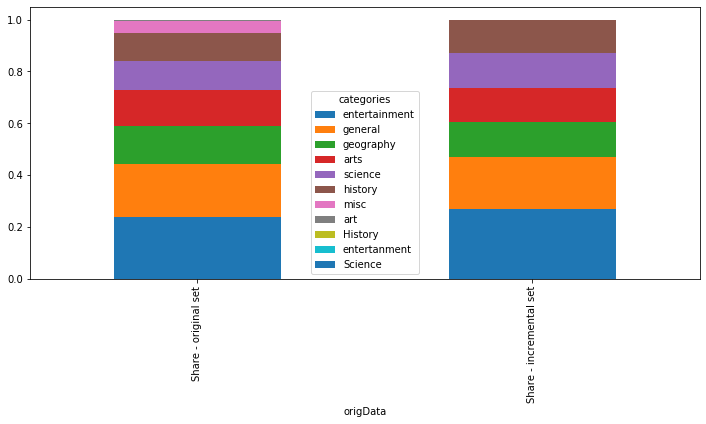

In [10]:
rtg_catShare.iloc[-2:, :].plot.bar(stacked = True)
plt.show()

## openTDB dataset (~3700 rows)

In [11]:
print(f'Row count: {len(opentdb)}\n')
print(f'Column names: {opentdb.columns.values}\n')
print(f'Categories: {opentdb["category"].unique()}\n')
print(f'Category count: {len(opentdb["category"].unique())}\n')
print(f'Duplicate questions: {len(opentdb[opentdb.duplicated(["question"])])}\n')

Row count: 3690

Column names: ['category' 'type' 'difficulty' 'question' 'correct_answer'
 'incorrect_answers']

Categories: ['Entertainment: Film' 'Celebrities' 'General Knowledge'
 'Entertainment: Television' 'Entertainment: Video Games' 'Mythology'
 'Sports' 'Entertainment: Cartoon & Animations' 'History' 'Vehicles'
 'Entertainment: Board Games' 'Geography' 'Entertainment: Music'
 'Science: Computers' 'Entertainment: Japanese Anime & Manga'
 'Science: Mathematics' 'Entertainment: Comics' 'Science & Nature'
 'Politics' 'Entertainment: Books' 'Animals' 'Art'
 'Entertainment: Musicals & Theatres' 'Science: Gadgets']

Category count: 24

Duplicate questions: 0



category
Animals                                   71
Art                                       27
Celebrities                               48
Entertainment: Board Games                58
Entertainment: Books                      87
Entertainment: Cartoon & Animations       85
Entertainment: Comics                     46
Entertainment: Film                      218
Entertainment: Japanese Anime & Manga    170
Entertainment: Music                     330
Entertainment: Musicals & Theatres        25
Entertainment: Television                162
Entertainment: Video Games               853
General Knowledge                        276
Geography                                255
History                                  272
Mythology                                 52
Politics                                  53
Science & Nature                         203
Science: Computers                       146
Science: Gadgets                          22
Science: Mathematics                      46
S

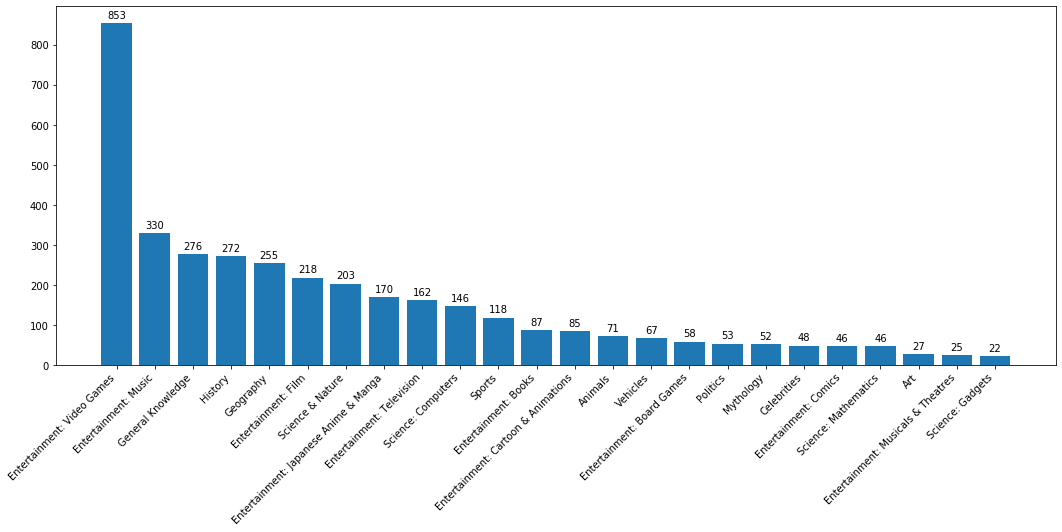

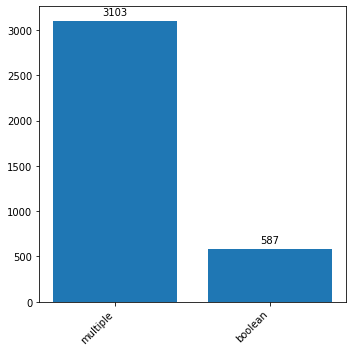

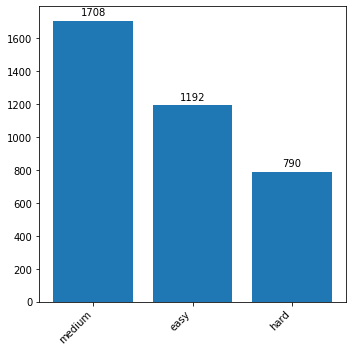

In [12]:
opentdbQperCat = opentdb.pivot_table(index = 'category', aggfunc = 'count', fill_value = 0).iloc[:,0].sort_values(ascending = False).rename('Questions per category')
opentdbPerType = opentdb.pivot_table(index = 'type', aggfunc = 'count', fill_value = 0).iloc[:,0].sort_values(ascending = False).rename('Questions per type')
opentdbPerDif = opentdb.pivot_table(index = 'difficulty', aggfunc = 'count', fill_value = 0).iloc[:,0].sort_values(ascending = False).rename('Questions per difficulty')


print( opentdbQperCat.sort_index() )
print('\n')
print( opentdbPerType )
print('\n')


# --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(15, 7.5))

x = np.arange(len(opentdbQperCat.index.values))

toPlot = ax.bar(x, height = opentdbQperCat)

ax.set_xticklabels(opentdbQperCat.index, rotation=45, ha='right')
ax.set_xticks(np.arange(len(opentdbQperCat.index.values)))
#plt.xticks(rotation=90)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(toPlot)      
fig.tight_layout()
plt.show()

# --------------------------------------------------------------

fig, ax = plt.subplots(figsize=(5, 5))

x = np.arange(len(opentdbPerType.index.values))

toPlot = ax.bar(x, height = opentdbPerType)

ax.set_xticklabels(opentdbPerType.index, rotation=45, ha='right')
ax.set_xticks(np.arange(len(opentdbPerType.index.values)))
#plt.xticks(rotation=90)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(toPlot)      
fig.tight_layout()
plt.show()

# --------------------------------------------------------------

fig, ax = plt.subplots(figsize=(5, 5))

x = np.arange(len(opentdbPerDif.index.values))

toPlot = ax.bar(x, height = opentdbPerDif)

ax.set_xticklabels(opentdbPerDif.index, rotation=45, ha='right')
ax.set_xticks(np.arange(len(opentdbPerDif.index.values)))
#plt.xticks(rotation=90)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(toPlot)      
fig.tight_layout()
plt.show()

## TDB dataset (~45600 rows)

In [13]:
print(f'Row count: {len(tdb)}\n')
print(f'Column names: {tdb.columns.values}\n')
print(f'Categories: {tdb["category_id"].unique()}\n')
print(f'Category count: {len(tdb["category_id"].unique())}\n')
print(f'Duplicate questions: {len(tdb[tdb.duplicated(["question"])])}\n')

Row count: 45588

Column names: ['category_id' 'lang' 'tags' 'question' 'answer' 'answers' 'source']

Categories: ['ART_AND_LITERATURE' 'ENTERTAINMENT' 'FOOD_AND_DRINKS' 'GEOGRAPHY'
 'HISTORY' 'LANGUAGE' 'MATHEMATICS' 'MUSIC' 'PEOPLE_AND_PLACES'
 'RELIGION_AND_MYTHOLOGY' 'SCIENCE_AND_NATURE' 'SPORT_AND_LEISURE'
 'TECH_AND_VIDEO_GAMES' 'TOYS_AND_GAMES' 'UNCATEGORIZED']

Category count: 15

Duplicate questions: 200



In [14]:
tdbQperCat = tdb.pivot_table(index = 'category_id', aggfunc = 'count', fill_value = 0).iloc[:,0].sort_values(ascending = False).rename('Questions per category')

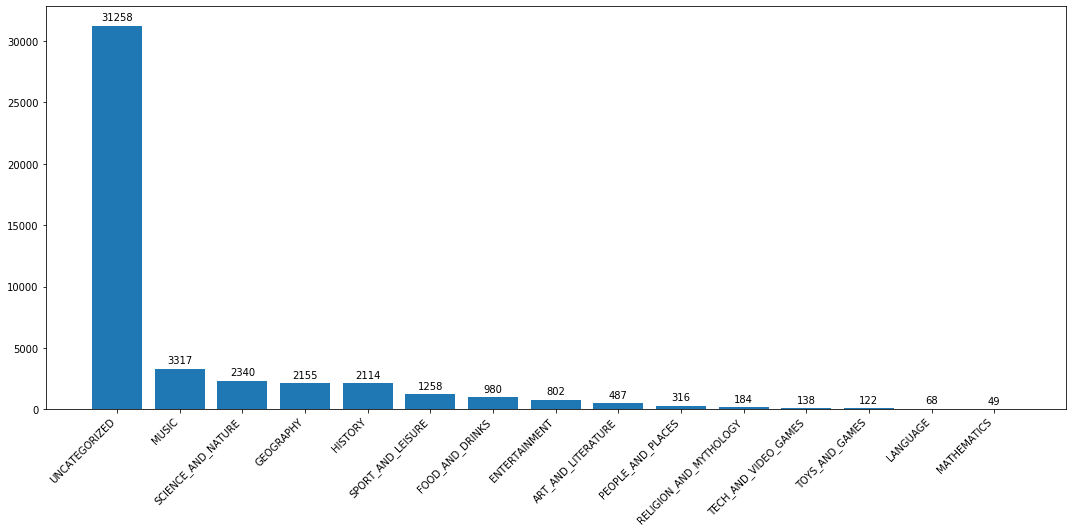

In [15]:
# --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(15, 7.5))

x = np.arange(len(tdbQperCat.index.values))

toPlot = ax.bar(x, height = tdbQperCat)

ax.set_xticklabels(tdbQperCat.index, rotation=45, ha='right')
ax.set_xticks(np.arange(len(tdbQperCat.index.values)))
#plt.xticks(rotation=90)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(toPlot)      
fig.tight_layout()
plt.show()
# --------------------------------------------------------------

## tFYI database (~1100 rows)

In [16]:
print(f'Row count: {len(tfyi)}\n')
print(f'Column names: {tfyi.columns.values}\n')
print(f'Categories: {tfyi["primary_category"].unique()}\n')
print(f'Category count: {len(tfyi["primary_category"].unique())}\n')
print(f'Duplicate questions: {len(tfyi[tfyi.duplicated(["question"])])}\n')

Row count: 1100

Column names: ['question' 'answer' 'categories' 'primary_category']

Categories: ['Literature Trivia' 'Food Trivia' 'Music Trivia' 'Television Trivia'
 'Video Game Trivia' 'History Trivia' 'Hockey Trivia' 'Movie Trivia'
 'Geography Trivia' 'Chemistry Trivia' 'Sports Trivia' 'Animal Trivia'
 'Science Trivia' 'Africa Trivia' 'Canada Trivia' 'Basketball Trivia'
 'Computer Trivia' 'Art Trivia' 'Baseball Trivia' 'Disney Trivia'
 'Football Trivia' 'Language Trivia' 'Automotive Trivia' 'Medical Trivia'
 'Planet Trivia' 'United States Trivia' 'Political Trivia' 'Europe Trivia'
 'Uncategorized' 'Math Trivia' 'Game Trivia' 'Religion Trivia'
 'Biology Trivia' 'Greek Trivia' 'England Trivia' 'Soccer Trivia'
 'Hollywood Trivia' 'Olympic Trivia' 'Korea Trivia' 'India Trivia'
 'Advertising Trivia' 'Harry Potter Trivia' 'Japan Trivia' 'Egypt Trivia'
 'Science Fiction Trivia' 'Physics Trivia' 'China Trivia' 'Word Trivia'
 'Olympics Trivia' 'Christmas Trivia' 'World Trivia' 'Funny Trivi

In [17]:
tfyiQperCat = tfyi.pivot_table(index = 'primary_category', aggfunc = 'count', fill_value = 0).iloc[:,0].sort_values(ascending = False).rename('Questions per category')
tfyiQperCat

primary_category
Geography Trivia            120
History Trivia              114
Movie Trivia                 91
Music Trivia                 72
Food Trivia                  64
Literature Trivia            61
Animal Trivia                53
Television Trivia            52
Science Trivia               42
Computer Trivia              33
Sports Trivia                31
Europe Trivia                30
Biology Trivia               26
Art Trivia                   23
Disney Trivia                20
Automotive Trivia            19
Baseball Trivia              18
Language Trivia              15
Planet Trivia                12
Football Trivia              11
Basketball Trivia            10
Game Trivia                  10
Chemistry Trivia              9
Geek Trivia                   9
Alcohol Trivia                9
Africa Trivia                 8
Canada Trivia                 8
Advertising Trivia            7
Aviation Trivia               7
Political Trivia              6
United States Trivia   

# Data exploration

In [18]:
# p = opentdb.head(100)
# print(p)